In [696]:
# Enter in cryptogram here
#crypto = "q paxaheflc fo q kaeogw sig sgebo iqez qxx ifo xfma lg hapgya saxx-bwgsw, liaw saqeo zqeb uxqooao lg qjgfz hafwu eapguwfraz. -meaz qxxaw".lower()
crypto = "uplkwbxqh ldvx ob xdhoxq bp sp d rpb pt byozmh, cwb lphb pt byx byozmh byxn ldvx xdhoxq bp sp spz'b zxxs bp cx spzx. -dzsn qppzxn".lower()

### Constants

In [697]:
alphabet = "a b c d e f g h i j k l m n o p q r s t u v w x y z".lower().split()

# Letter Frequencies in English
english = {'a':.08167, 'b':.01492, 'c':.02782, 'd':.04253, 'e':.12702, 'f':.02228, 'g':.02015, 'h':.06094, 'i':.06966, 
           'j':.00153, 'k':.00772, 'l':.04025, 'm':.02406, 'n':.06749, 'o':.07507, 'p':.01929, 'q':.00095, 'r':.05987,
           's':.06327, 't':.09056, 'u':.02758, 'v':.00978, 'w':.02360, 'x':.00150, 'y':.01974, 'z':.00074}

# First Letter Frequencies in English
eng_fir = {'a':.11682, 'b':.04434, 'c':.05238, 'd':.03174, 'e':.02799, 'f':.04027, 'g':.01642, 'h':.04200, 'i':.07294, 
           'j':.00511, 'k':.00456, 'l':.02415, 'm':.03826, 'n':.02284, 'o':.07631, 'p':.04319, 'q':.00222, 'r':.02826,
           's':.06686, 't':.15978, 'u':.01183, 'v':.00824, 'w':.05497, 'x':.00045, 'y':.00763, 'z':.00045}

# Double Letter Frequencies in English
eng_dbl = {'a':.00003, 'b':.00011, 'c':.00083, 'd':.00043, 'e':.00378, 'f':.00146, 'g':.00025, 'h':.00001, 'i':.00023, 
           'j':.00000, 'k':.00000, 'l':.00577, 'm':.00096, 'n':.00073, 'o':.00210, 'p':.00137, 'q':.00000, 'r':.00121,
           's':.00405, 't':.00171, 'u':.00001, 'v':.00000, 'w':.00000, 'x':.00003, 'y':.00000, 'z':.00003}

def normalize(value_dict):
    total = sum(value_dict.values())
    for k, v in value_dict.items():
        value_dict[k] = v/total
    return value_dict

# Normalize so all probabilities sum to 1
eng_dbl = normalize(eng_dbl)

### Print Letter Frequencies

In [698]:
# Remove non-alphabetic characters
import re
regex = re.compile('[^a-zA-Z]')
crypto_letters = regex.sub('', crypto)

# Count letter frequencies
import collections
c = collections.Counter(crypto_letters)
print("Cryptogram Letter Counts")
print(c.most_common())
print()
print("Letter Frequencies in English Language")
l_freq_eng = [k for k,v in collections.Counter(english).most_common()]
print(l_freq_eng)

Cryptogram Letter Counts
[('p', 14), ('x', 14), ('b', 13), ('z', 7), ('h', 6), ('d', 6), ('s', 6), ('o', 5), ('l', 4), ('q', 4), ('y', 4), ('n', 3), ('w', 2), ('v', 2), ('t', 2), ('m', 2), ('c', 2), ('u', 1), ('k', 1), ('r', 1)]

Letter Frequencies in English Language
['e', 't', 'a', 'o', 'i', 'n', 's', 'h', 'r', 'd', 'l', 'c', 'u', 'm', 'w', 'f', 'g', 'y', 'p', 'b', 'v', 'k', 'j', 'x', 'q', 'z']


<BarContainer object of 20 artists>

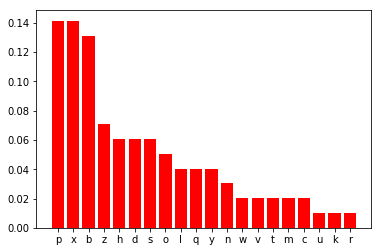

In [699]:
# Cryptograms's Letter Count Percentages

import matplotlib.pyplot as plt

# Get most common key value pairs as x, y axes
most_common_k = [k for k, v in c.most_common()]
most_common_v = [v/len(crypto_letters) for k, v in c.most_common()]

plt.bar(most_common_k, most_common_v, align='center', color='red')

<BarContainer object of 26 artists>

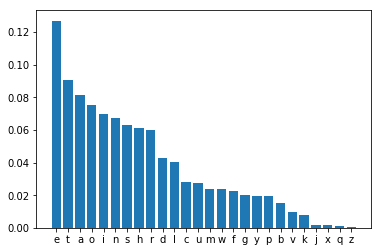

In [700]:
# English's Letter Count Percentages
english_count = collections.Counter(english)
english_k = [k for k, v in english_count.most_common()]
english_v = [v for k, v in english_count.most_common()]
plt.bar(english_k, english_v, align='center')

<BarContainer object of 12 artists>

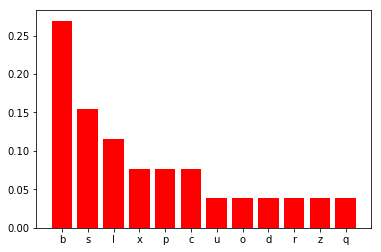

In [701]:
# Cryptogram's First Letter Count Percentages
first_letters = [w[0] for w in crypto.split() if w[0].isalpha()]
first_letter_cnt = collections.Counter(first_letters)
cry_fir_k = [k for k, v in first_letter_cnt.most_common()]
cry_fir_v = [v/len(first_letters) for k, v in first_letter_cnt.most_common()]
plt.bar(cry_fir_k, cry_fir_v, align='center', color='red')

<BarContainer object of 26 artists>

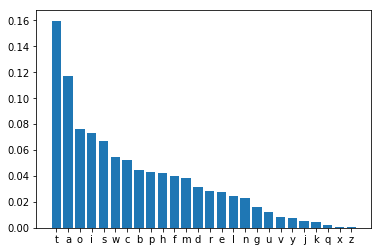

In [702]:
# English's First Letter Count Percentages
eng_fir_count = collections.Counter(eng_fir)
eng_fir_k = [k for k, v in eng_fir_count.most_common()]
eng_fir_v = [v for k, v in eng_fir_count.most_common()]
plt.bar(eng_fir_k, eng_fir_v, align='center')

### Index of Coincedence
How closely the distribution matches the english letter frequency. If match, then it is a substitution cypher.
See: http://practicalcryptography.com/cryptanalysis/text-characterisation/index-coincidence/

In [703]:
IC_sub = 0.066 # Index of Coincidence for a substitution cypher
IC_uni = 1/len(alphabet) # Index of Coincidence for a uniform distribution
total = 0
for l in alphabet:
    total += c[l]*(c[l] - 1)
    
IC = total / (len(crypto_letters)*(len(crypto_letters) - 1)) # Index of Coincidence for this cypher
print('I.C.: {}'.format(IC))
print('I.C. Substitution Cypher: {}'.format(IC_sub))
print('I.C. Uniform Distribution: {}'.format(IC_uni))
print()

delta_sub = abs(IC - IC_sub)
delta_uni = abs(IC - IC_uni)
if delta_sub < delta_uni:
    print('Closer to substitution cypher distribution.')
else:
    print('Closer to a uniform cypher distribution.')

I.C.: 0.07462378890950319
I.C. Substitution Cypher: 0.066
I.C. Uniform Distribution: 0.038461538461538464

Closer to substitution cypher distribution.


### Double Letter Frequencies

In [704]:
prev_l = ''
double_letters = []
for l in crypto:
  if l.isalpha():
    if prev_l == l:
      double_letters += [l]
    prev_l = l
double_letters = set(double_letters)
 
print("Cryptograms Double Letter Frequency")
for d in double_letters:
  print('{}:{}, '.format(d, c[d]), end='')

# Frequency of double letters
dl = "l s e o t f p r m c n d g i b".split()
print()
print("Double Letter Frequency in English")
print(dl)

Cryptograms Double Letter Frequency
x:14, p:14, 
Double Letter Frequency in English
['l', 's', 'e', 'o', 't', 'f', 'p', 'r', 'm', 'c', 'n', 'd', 'g', 'i', 'b']


### Print Known Letters

In [705]:
# Create alphabet to crypto letter mappings
alphabet = "a b c d e f g h i j k l m n o p q r s t u v w x y z".lower().split()
replaces = "- t - - - - - - - - - - - - - - - - - - - - - e - n".lower().split()

In [706]:
# Convert letter mapping dictionary from letter mapping lists above
alpha2crypto_guess = {}
for l, r in zip(alphabet, replaces):
  if r.isalpha():
    alpha2crypto_guess[l] = r
  else:
    alpha2crypto_guess[l] = '_'
    
# Show letter replacements
for k, i in alpha2crypto_guess.items():
  print('{}={}, '.format(k, i), end='')

a=_, b=t, c=_, d=_, e=_, f=_, g=_, h=_, i=_, j=_, k=_, l=_, m=_, n=_, o=_, p=_, q=_, r=_, s=_, t=_, u=_, v=_, w=_, x=e, y=_, z=n, 

In [707]:
# Decode
def crypto_decode(alpha2crypto):
  decoded = []

  for character in crypto:
    if character.isalpha():
      decoded += [alpha2crypto[character]]
    else:
      decoded += [character]
      
  return decoded

In [708]:
def print_decoded(decoded):
  for l in decoded:
    print(l, end='')
  print()

In [709]:
def print_crypto(crypto):
  for l in crypto:
    print(l, end='')

In [710]:
decoded = crypto_decode(alpha2crypto_guess)
print_decoded(decoded)
print_crypto(crypto)

_____te__ ___e _t e___e_ t_ __ _ __t __ t__n__, __t ___t __ t_e t__n__ t_e_ ___e e___e_ t_ __ __n't nee_ t_ _e __ne. -_n__ ___ne_
uplkwbxqh ldvx ob xdhoxq bp sp d rpb pt byozmh, cwb lphb pt byx byozmh byxn ldvx xdhoxq bp sp spz'b zxxs bp cx spzx. -dzsn qppzxn

### Calculate Probabilities

In [711]:
# Letters known not to be a cryptogram letter
not_letters = {'a':[],
               'b':[], 
               'c':[], 
               'd':[], 
               'e':[], 
               'f':[], 
               'g':[], 
               'h':[], 
               'i':[], 
               'j':[], 
               'k':[], 
               'l':[], 
               'm':[], 
               'n':[], 
               'o':[], 
               'p':[], 
               'q':[], 
               'r':[],
               's':['o', 'a'], 
               't':[], 
               'u':[], 
               'v':[], 
               'w':[], 
               'x':[], 
               'y':[], 
               'z':[]}

In [712]:
one_letter_cryptos = []
for w in crypto.split():
    if len(w) == 1:
        one_letter_cryptos += [w]
one_letter_cryptos = set(one_letter_cryptos)

In [713]:
"""
For each dictionary of probabilities passed in, update probabilities to all sum to 1 after keys are removed

    prob_dict: dictionary of the alphabet with probabilities of each letter being the correct letter for a given crypto letter
    zero_prob_letters: list of all letters that are known to not be possible as substitutions for the given crypto letter 
    invert_zero_prob_list: if True, all letters not in zero_prob_letters list will be set to 0.
"""
def update_probabilities(prob_dict, zero_prob_letters, invert_zero_prob_list=False):
    if invert_zero_prob_list:
        zero_prob_letters = [l for l in alphabet if l not in zero_prob_letters]
        
    update_denominator = 1
    for k in zero_prob_letters: 
        update_denominator -= prob_dict[k]
        
    for k, v in prob_dict.items():
        if k in zero_prob_letters:
            prob_dict[k] = 0.
        else:
            prob_dict[k] = v/update_denominator
    return prob_dict

In [714]:
probs = {l:english.copy() for l in alphabet}
guess_letters = [l for l in set(alpha2crypto_guess.values()) if l.isalpha()]
for c_l in alphabet:    
    # Letter doesn't exist in cypher
    if c_l not in c.keys():
        probs[c_l] = update_probabilities(probs[c_l], alphabet) # Set all letters to 0.0% probability
        continue
        
    # Letter defined in guess
    if alpha2crypto_guess[c_l] != '_':
        probs[c_l] = update_probabilities(probs[c_l], [l for l in alphabet if l != alpha2crypto_guess[c_l]])
        continue
        
    # One letter word
    if c_l in one_letter_cryptos:
        #probs[c_l] = {k:v for k,v in english.items() if k == 'a' or k == 'i'} 
        probs[c_l] = update_probabilities(probs[c_l], [l for l in ['a', 'i'] if l not in guess_letters], invert_zero_prob_list=True)
        continue
    
    if c_l in first_letters:
        probs[c_l] = eng_fir
        
    if c_l in double_letters:
        probs[c_l] = eng_dbl
    
    probs[c_l] = update_probabilities(probs[c_l], guess_letters+not_letters[c_l]) # Take probability to 0% for letters already guessed by user
        

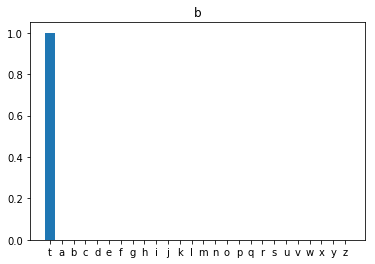

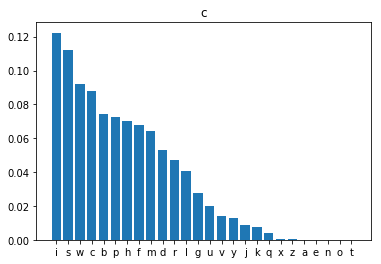

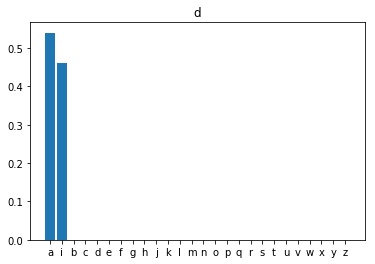

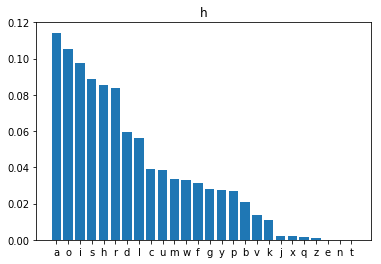

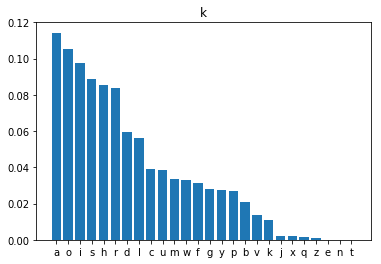

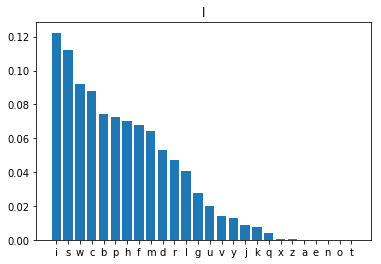

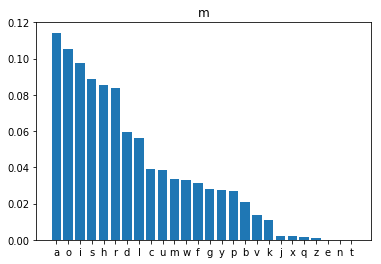

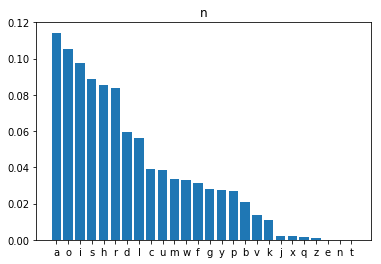

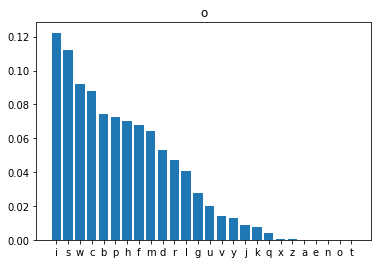

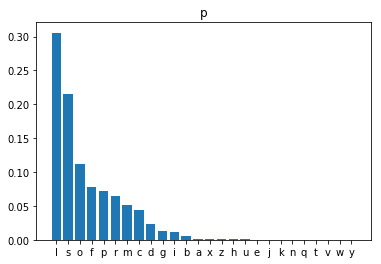

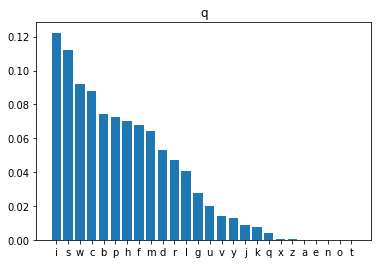

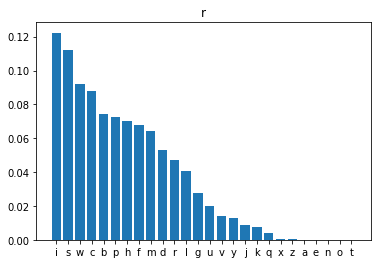

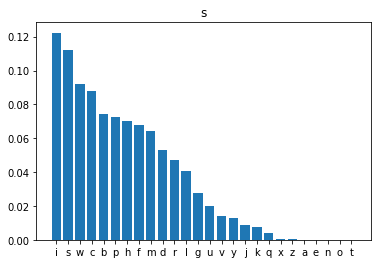

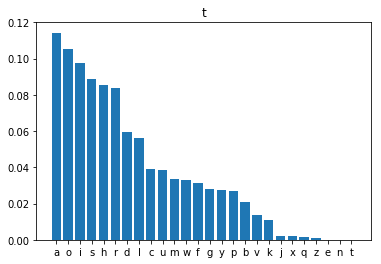

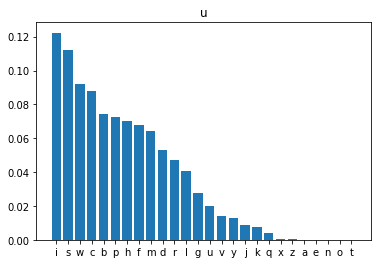

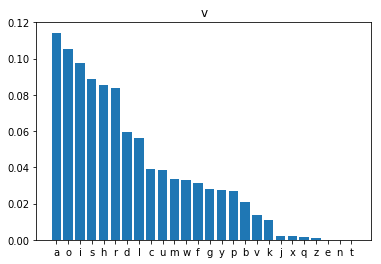

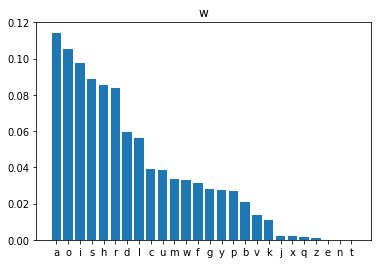

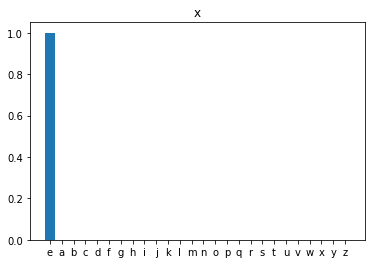

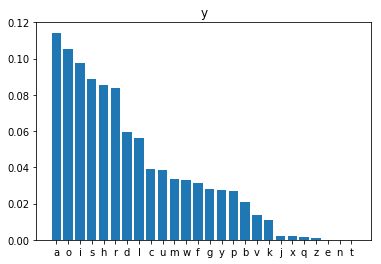

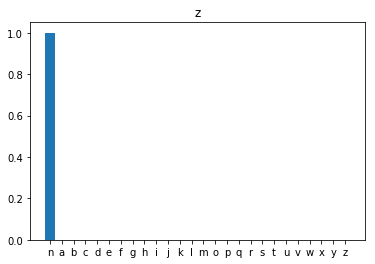

In [715]:
for l, v in probs.items():
    #print(sum(v.values()))
    #print('{}:: {}'.format(l, v))
    if sum(v.values()) > 0:
        counts = collections.Counter(v).most_common()
        counts_k = [k for k, v in counts]
        counts_v = [v for k, v in counts]
        fig, ax = plt.subplots()
        ax.set_title(l)
        ax.bar(counts_k, counts_v, align='center')
    
    
#     largest_k = 'n/a'
#     largest_v = 0
#     for k, e_v in v.items():
#         if largest_v < e_v:
#             largest_v = e_v
#             largest_k = k
#     print('{}={}: {}'.format(l,largest_k, largest_v))

### Get Highest Probabilities

In [716]:
all_probs = {}

for l, v in probs.items():
    if alpha2crypto_guess[l] != '_':
        continue
        
    for k, v in v.items(): 
        all_probs[l+k] = v

all_sorted = collections.Counter(all_probs).most_common()

In [717]:
limit = 7
sorted_permutations = list(itertools.permutations(all_sorted[:limit]))
print(len(sorted_permutations))

5040


In [584]:
# sum(dict(sorted_permutations[0]).values())

1.6423902275145217

In [693]:
k_list = list(dict(sorted_permutations[262]).keys())[:limit-1]
c_l_list = [f[0] for f in k_list]
#print(k_list)
print(c_l_list)
if len(c_l_list) != len(set(c_l_list)):
    print("Contains Duplicate")

['p', 'd', 'l', 'c', 'd']
Contains Duplicate


In [689]:
len(sorted_permutations)

720

In [728]:
all_summed = {}
for p in sorted_permutations:
    key_list = list(dict(p).keys())[:limit-2]
    c_l_list = [f[0] for f in key_list]
    if len(c_l_list) > len(set(c_l_list)):
        continue
        
    key = ' '.join(key_list)
    all_summed[key] = sum(list(dict(p).values())[:limit-2])

In [729]:
all_summed

{'da pl ci li oi': 1.2122477931240754,
 'da pl ci oi li': 1.2122477931240754,
 'da pl li ci oi': 1.2122477931240754,
 'da pl li oi ci': 1.2122477931240754,
 'da pl oi ci li': 1.2122477931240754,
 'da pl oi li ci': 1.2122477931240754,
 'da ps ci li oi': 1.121146098208821,
 'da ps ci oi li': 1.121146098208821,
 'da ps li ci oi': 1.121146098208821,
 'da ps li oi ci': 1.121146098208821,
 'da ps oi ci li': 1.121146098208821,
 'da ps oi li ci': 1.121146098208821,
 'da ci pl li oi': 1.2122477931240754,
 'da ci pl oi li': 1.2122477931240754,
 'da ci ps li oi': 1.1211460982088213,
 'da ci ps oi li': 1.1211460982088213,
 'da ci li pl oi': 1.2122477931240754,
 'da ci li ps oi': 1.121146098208821,
 'da ci li oi pl': 1.2122477931240754,
 'da ci li oi ps': 1.1211460982088213,
 'da ci oi pl li': 1.2122477931240754,
 'da ci oi ps li': 1.121146098208821,
 'da ci oi li pl': 1.2122477931240754,
 'da ci oi li ps': 1.1211460982088213,
 'da li pl ci oi': 1.2122477931240754,
 'da li pl oi ci': 1.212247793124

In [730]:
sorted_all_summed = collections.Counter(all_summed).most_common()

In [731]:
sorted_all_summed

[('da pl ci li oi', 1.2122477931240754),
 ('da pl ci oi li', 1.2122477931240754),
 ('da pl li ci oi', 1.2122477931240754),
 ('da pl li oi ci', 1.2122477931240754),
 ('da pl oi ci li', 1.2122477931240754),
 ('da pl oi li ci', 1.2122477931240754),
 ('da ci pl li oi', 1.2122477931240754),
 ('da ci pl oi li', 1.2122477931240754),
 ('da ci li pl oi', 1.2122477931240754),
 ('da ci li oi pl', 1.2122477931240754),
 ('da ci oi pl li', 1.2122477931240754),
 ('da ci oi li pl', 1.2122477931240754),
 ('da li pl ci oi', 1.2122477931240754),
 ('da li pl oi ci', 1.2122477931240754),
 ('da li ci pl oi', 1.2122477931240754),
 ('da li ci oi pl', 1.2122477931240754),
 ('da li oi pl ci', 1.2122477931240754),
 ('da li oi ci pl', 1.2122477931240754),
 ('da oi pl ci li', 1.2122477931240754),
 ('da oi pl li ci', 1.2122477931240754),
 ('da oi ci pl li', 1.2122477931240754),
 ('da oi ci li pl', 1.2122477931240754),
 ('da oi li pl ci', 1.2122477931240754),
 ('da oi li ci pl', 1.2122477931240754),
 ('pl da ci li o

In [635]:
# key_list = list(dict(sorted_permutations[0]).keys())[:limit-1]
# for k in key_list:
#     k_list = k.split()
#     c_l_list = [f[0] for f in k_list]
#     if len(c_l_list) > len(set(c_l_list)):
#         print(key_list)

In [673]:
for k, v in all_summed:
    k_list = k.split()
    [f for f in k_list]

In [570]:
# guess = alpha2crypto_guess.copy()
# guess_cnt = len([k for k, v in guess.items() if v != '_'])
# limit = 3

# for k, v in dict(all_sorted).items():
# #     c_l = k[0]
# #     e_l = k[1]
#     largest = {}
#     for 
    
    

da
di
pl
ps
ci
li
oi
qi
ri
si
ui
ha
ka
ma
na
ta
va
wa
ya
cs
ls
os
qs
rs
ss
us
po
ho
ko
mo
no
to
vo
wo
yo
hi
ki
mi
ni
ti
vi
wi
yi
cw
lw
ow
qw
rw
sw
uw
hs
ks
ms
ns
ts
vs
ws
ys
cc
lc
oc
qc
rc
sc
uc
hh
kh
mh
nh
th
vh
wh
yh
hr
kr
mr
nr
tr
vr
wr
yr
pf
cb
lb
ob
qb
rb
sb
ub
pp
cp
lp
op
qp
rp
sp
up
ch
lh
oh
qh
rh
sh
uh
cf
lf
of
qf
rf
sf
uf
cm
lm
om
qm
rm
sm
um
pr
hd
kd
md
nd
td
vd
wd
yd
hl
kl
ml
nl
tl
vl
wl
yl
cd
ld
od
qd
rd
sd
ud
pm
cr
lr
or
qr
rr
sr
ur
pc
cl
ll
ol
ql
rl
sl
ul
hc
kc
mc
nc
tc
vc
wc
yc
hu
ku
mu
nu
tu
vu
wu
yu
hm
km
mm
nm
tm
vm
wm
ym
hw
kw
mw
nw
tw
vw
ww
yw
hf
kf
mf
nf
tf
vf
wf
yf
hg
kg
mg
ng
tg
vg
wg
yg
hy
ky
my
ny
ty
vy
wy
yy
cg
lg
og
qg
rg
sg
ug
hp
kp
mp
np
tp
vp
wp
yp
pd
hb
kb
mb
nb
tb
vb
wb
yb
cu
lu
ou
qu
ru
su
uu
cv
lv
ov
qv
rv
sv
uv
hv
kv
mv
nv
tv
vv
wv
yv
pg
cy
ly
oy
qy
ry
sy
uy
pi
hk
kk
mk
nk
tk
vk
wk
yk
cj
lj
oj
qj
rj
sj
uj
ck
lk
ok
qk
rk
sk
uk
pb
cq
lq
oq
qq
rq
sq
uq
hj
kj
mj
nj
tj
vj
wj
yj
hx
kx
mx
nx
tx
vx
wx
yx
pa
px
pz
hq
kq
mq
nq
tq
vq
wq
yq
hz
kz
mz
nz
tz
vz
wz
y

### Get Word List

In [280]:
import pandas as pd
url = 'https://raw.githubusercontent.com/dwyl/english-words/master/words.txt'
#url = 'https://gist.githubusercontent.com/h3xx/1976236/raw/bbabb412261386673eff521dddbe1dc815373b1d/wiki-100k.txt'
eng_words = pd.read_csv(url, sep=" ", header=None, skiprows=26, error_bad_lines=False)
eng_words.columns=["words"]
eng_words['words'] = eng_words['words'].str.lower()

In [411]:
"""
Get the matching strings from a pandas dataframe given the passed regular expression
    df: dataframe of strings to search
    regexp: regular expression to match against
    match_word_len: if True the matching regexp must start and end with the passed regexp
"""
def get_re_match_list(df, regexp, match_word_len=False):
    if match_word_len:
        regexp = '^'+regexp+'$'
        
    return df[df.str.contains(regexp, regex=True) == True]

In [412]:
"""
Get the frequency of occurence of words that match length and letter positions of words in the partially decoded string
    word_df: dataframe of words to search
    decoded_str: partially decoded string to search word frequencies. Undecoded letters should be '_' underscores
    len_min: any words below this number length will be ignored
"""
def get_word_frequencies(word_df, decoded_str, len_min=4):
    frequencies = {}
    for w in decoded_str.split():
        if len(w) > len_min:
            regexp = ''
            for l in w:
                if l == '_':
                    regexp += '[-A-Za-z]'
                else:
                    regexp += l
            #length = len(word_df[word_df.str.contains('^'+regexp+'$', regex=True) == True])
            length = len(get_re_match_list(word_df, regexp, match_word_len=True))
            frequencies[w] = length
    return frequencies    

In [413]:
get_word_frequencies(eng_words['words'], ''.join(decoded))

{'_____te__': 594,
 'e___e_': 183,
 't__n__,': 0,
 't__n__': 155,
 "i_n't": 1,
 'i_ne.': 5,
 '-_ni_': 0,
 '___ne_': 660}

In [337]:
get_re_match_list(eng_words['words'], "[a-z][a-z][a-z]'t", match_word_len=True)

8055      ain't
13499     amn't
58471     can't
112426    don't
167095    han't
198335    isn't
462039    won't
Name: words, dtype: object

# Try to Automate Solving

In [68]:
#two_letter_words = ['of', 'to', 'in', 'it', 'is', 'be', 'as', 'at', 'so', 'we', 'he', 'by', 'or', 'on', 'do', 'if', 'me', 'my', 'up', 'an', 'go', 'no', 'us', 'am']
two_letter_words = eng_words[eng_words['words'].str.len() == 2]
three_letter_words = eng_words[eng_words['words'].str.len() == 3]
four_letter_words = eng_words[eng_words['words'].str.len() == 4]
five_letter_words = eng_words[eng_words['words'].str.len() == 5]
six_letter_words = eng_words[eng_words['words'].str.len() == 6]
seven_letter_words = eng_words[eng_words['words'].str.len() == 7]

In [69]:
def get_letters(alpha2crypto, crypto_cnts, l_freq_eng, try_n=5):
  crypto_used_letters = [k for k, v in alpha2crypto.items() if v != '_']
  print(crypto_used_letters)
  
  crypto_letters = [l for l in crypto_cnts if l not in crypto_used_letters]
  print(crypto_letters)
  if len(crypto_letters) > try_n:
    crypto_letters = crypto_letters[:try_n]
  
  eng_used_letters = [l for l in alpha2crypto.values() if l != '_']
  eng_letters = [l for l in l_freq_eng if l not in eng_used_letters]
  if len(eng_letters) > try_n:
    eng_letters = eng_letters[:try_n]
    
  return crypto_letters, eng_letters 

In [71]:
try_n = 5 # Number of letters to test
potential_decodings = []
most_probable = collections.Counter()
crypto_letters, eng_letters = get_letters(alpha2crypto_guess, c, l_freq_eng)

import itertools
crypto_permutations = list(itertools.permutations(crypto_letters)) # Create all possible combinations of the most common letters

greatest_prob = 0
for permutation in crypto_permutations:
  alpha2crypto = alpha2crypto_guess.copy()
  
  # Add mappings to dictionary for mapped letters (mapped letters are assigned from the most common permutations)
  for i, l in enumerate(permutation):
      alpha2crypto[l] = eng_letters[i]
      
  # Add _ for all unmapped letters
  for l in alphabet:
    if l not in alpha2crypto.keys():
      alpha2crypto[l] = '_'
  
  potential_decoding = crypto_decode(alpha2crypto)
  
  # 1 letter words have to be 'I' or 'A', else skip
  valid = True
  valid_cnt = 0
  invalid_cnt = 0
  words = ''.join(potential_decoding).split()
  for w in words:
    if len(w) == 1 and w != '_':
      if w != 'i' and w != 'a': 
        valid = False
        break
    else:
      df = eng_words
      if len(w) == 2:
        df = two_letter_words
      elif len(w) == 3:
        df = three_letter_words
      elif len(w) == 4:
        df = four_letter_words
      elif len(w) == 5:
        df = five_letter_words
      elif len(w) == 6:
        df = six_letter_words
      elif len(w) == 7:
        df = seven_letter_words
      
      regexp = ''
      for l in w:
        if l == '_':
          regexp += '[-A-Za-z]'
        else:
          regexp += l
      valid_word = df['words'].str.contains(regexp, regex=True).any()
      if valid_word:
        valid_cnt += 1
      else:
        invalid_cnt +=1
#         if invalid_cnt/len(words) > 0.5:
#           valid = False
#           break
        
  if valid:
    match_probability = valid_cnt/len(words)
    most_probable[''.join(potential_decoding)] = match_probability
    
    if len(most_probable) > 5:
      most_probable = collections.Counter(dict(most_probable.most_common(5)))
      
    if match_probability > greatest_prob:
      greatest_prob = match_probability
      print(match_probability)
      print_decoded(potential_decoding)
    
    
    potential_decodings += [potential_decoding]
  
  #print_decoded(potential_decoding)  
print_crypto(crypto)

['b', 's', 'x']
['u', 'p', 'l', 'k', 'w', 'q', 'h', 'd', 'v', 'o', 'r', 't', 'y', 'z', 'm', 'c', 'n']
0.8148148148148148
oinshte__ n__e _t e___e_ ti ai _ _it i_ t_____, _ht ni_t i_ t_e t_____ t_e_ n__e e___e_ ti ai ai_'t _eea ti _e ai_e. -__a_ _ii_e_
0.8518518518518519
oinhste__ n__e _t e___e_ ti ai _ _it i_ t_____, _st ni_t i_ t_e t_____ t_e_ n__e e___e_ ti ai ai_'t _eea ti _e ai_e. -__a_ _ii_e_
uplkwbxqh ldvx ob xdhoxq bp sp d rpb pt byozmh, cwb lphb pt byx byozmh byxn ldvx xdhoxq bp sp spz'b zxxs bp cx spzx. -dzsn qppzxn

In [72]:
most_probable.most_common()

[("oinhste__ n__e _t e___e_ ti ai _ _it i_ t_____, _st ni_t i_ t_e t_____ t_e_ n__e e___e_ ti ai ai_'t _eea ti _e ai_e. -__a_ _ii_e_",
  0.8518518518518519),
 ("oihnste__ h__e _t e___e_ ti ai _ _it i_ t_____, _st hi_t i_ t_e t_____ t_e_ h__e e___e_ ti ai ai_'t _eea ti _e ai_e. -__a_ _ii_e_",
  0.8518518518518519),
 ("oishnte__ s__e _t e___e_ ti ai _ _it i_ t_____, _nt si_t i_ t_e t_____ t_e_ s__e e___e_ ti ai ai_'t _eea ti _e ai_e. -__a_ _ii_e_",
  0.8518518518518519),
 ("oihsnte__ h__e _t e___e_ ti ai _ _it i_ t_____, _nt hi_t i_ t_e t_____ t_e_ h__e e___e_ ti ai ai_'t _eea ti _e ai_e. -__a_ _ii_e_",
  0.8518518518518519),
 ("nihoste__ h__e _t e___e_ ti ai _ _it i_ t_____, _st hi_t i_ t_e t_____ t_e_ h__e e___e_ ti ai ai_'t _eea ti _e ai_e. -__a_ _ii_e_",
  0.8518518518518519)]

### Compare crypto to all english words

In [0]:
match_count = collections.Counter()
for i, p in enumerate(potential_decodings):
  words = ''.join(p).split()
  
  word_matches = []
  cnt = 0
  for w in words:
    if '_' not in w:
      if eng_words['words'].eq(w).any():
        word_matches += [w]
        cnt += 1
  match_count[''.join(p)] = cnt
  if len(set(word_matches)) > 2:      
    #print('{}: {}'.format(i, set(word_matches)))
    print_decoded(p)

_oh__tern ha_e it eanier to so a _ot o_ t_il_n, __t hont o_ t_e t_il_n t_e_ ha_e eanier to so sol't lees to _e sole. -als_ roole_
_ol__tehs la_e it easieh to no a _ot o_ t_ir_s, __t lost o_ t_e t_ir_s t_e_ la_e easieh to no nor't reen to _e nore. -arn_ hoore_
_ol__ters la_e it easier to no a _ot o_ t_ih_s, __t lost o_ t_e t_ih_s t_e_ la_e easier to no noh't heen to _e nohe. -ahn_ roohe_
_oh__tern hi_e at einaer to so i _ot o_ t_al_n, __t hont o_ t_e t_al_n t_e_ hi_e einaer to so sol't lees to _e sole. -ils_ roole_
_ol__tehs li_e at eisaeh to no i _ot o_ t_ar_s, __t lost o_ t_e t_ar_s t_e_ li_e eisaeh to no nor't reen to _e nore. -irn_ hoore_
_oh__selr ha_e is eariel so no a _os o_ s_it_r, __s hors o_ s_e s_it_r s_e_ ha_e eariel so no not's teen so _e note. -atn_ loote_
_ol__sehr la_e is earieh so no a _os o_ s_it_r, __s lors o_ s_e s_it_r s_e_ la_e earieh so no not's teen so _e note. -atn_ hoote_
_or__selh ra_e is eahiel so no a _os o_ s_it_h, __s rohs o_ s_e s_it_h s_e_ ra_e eahiel so

In [0]:
match_count.most_common()

[('a _ete_ni__ is a _ensor __o _on_s _an_ att _is ti_e _o _e_o_e _ett-_ro_r, __er _eans _an_ _tasses _o a_oi_ _eir_ ne_o_ri_e_. -_ne_ atter',
  5),
 ('a _ete_si__ in a _esnor __o _os_n _as_ att _in ti_e _o _e_o_e _ett-_ro_r, __er _easn _as_ _tannen _o a_oi_ _eir_ se_o_ri_e_. -_se_ atter',
  5),
 ('a _ete_oi__ is a _eosnr __n _no_s _ao_ att _is ti_e _n _e_n_e _ett-_rn_r, __er _eaos _ao_ _tasses _n a_ni_ _eir_ oe_n_ri_e_. -_oe_ atter',
  5),
 ('a _ete_oi__ in a _eonsr __s _so_n _ao_ att _in ti_e _s _e_s_e _ett-_rs_r, __er _eaon _ao_ _tannen _s a_si_ _eir_ oe_s_ri_e_. -_oe_ atter',
  5),
 ('a _ete_ns__ so a _enoir __i _in_o _an_ att _so ts_e _i _e_i_e _ett-_ri_r, __er _eano _an_ _taooeo _i a_is_ _esr_ ne_i_rs_e_. -_ne_ atter',
  5),
 ('a _ete_sn__ no a _esoir __i _is_o _as_ att _no tn_e _i _e_i_e _ett-_ri_r, __er _easo _as_ _taooeo _i a_in_ _enr_ se_i_rn_e_. -_se_ atter',
  5),
 ('a _ete_is__ so a _eionr __n _ni_o _ai_ att _so ts_e _n _e_n_e _ett-_rn_r, __er _eaio _ai_ _taooeo _n a_ns_ _e

### Method 2

In [0]:
one_letter_words = ['a', 'i']
two_letter_words = ['of', 'to', 'in', 'it', 'is', 'be', 'as', 'at', 'so', 'we', 'he', 'by', 'or', 'on', 'do', 'if', 'me', 'my', 'up', 'an', 'go', 'no', 'us', 'am']
one_letter_crypto = set([w for w in crypto.split() if len(w) == 1])
two_letter_crypto = set([w for w in crypto.split() if len(w) == 2])

In [0]:
one_letter_most_common = [l for l in [k for k, _ in c.most_common()] if l in one_letter_words]

In [0]:
try_n = 3 # Number of letters to test
potential_decodings = []

most_common = [l for l, v in c.most_common() if l not in one_letter] # Most common excluding one letter words in crypto
crypto_permutations = list(itertools.permutations([l for l in most_common[:try_n]])) # Create all possible combinations of the most common letters

In [0]:
def create_decoding(alpha2crypto, crypto_letters, mapped_letters):
  # Add mappings to dictionary for mapped letters (mapped letters are assigned from the most common permutations)
  for i, l in enumerate(crypto_letters):
      alpha2crypto[l] = mapped_letters[i]

  # Add _ for all unmapped letters
  for l in alphabet:
    if l not in alpha2crypto.keys():
      alpha2crypto[l] = '_'

  return crypto_decode(alpha2crypto)

In [0]:
alpha2crypto = {}
one_letter_crypto_permutations = list(itertools.permutations(one_letter_crypto)) # Create all possible combinations of single letter words
for olcp in one_letter_crypto_permutations:
  for olc_i, olc in enumerate(olcp):
    alpha2crypto[olc] = one_letter_most_common[olc_i]
  
alpha2crypto

{'q': 'a'}

In [0]:
for permutation in crypto_permutations:
  alpha2crypto = {}

  # Add mappings to dictionary for mapped letters (mapped letters are assigned from the most common permutations)
  for i, l in enumerate(permutation):
      alpha2crypto[l] = l_freq_eng[:try_n][i]

  # Add _ for all unmapped letters
  for l in alphabet:
    if l not in alpha2crypto.keys():
      alpha2crypto[l] = '_'

  potential_decoding = crypto_decode(alpha2crypto)
  potential_decodings += [potential_decoding]
  print_decoded(potential_decoding)  
print_crypto(crypto)

[('a', 'x', 'g', 'e', 'o', 'f', 'w'),
 ('a', 'x', 'g', 'e', 'o', 'w', 'f'),
 ('a', 'x', 'g', 'e', 'f', 'o', 'w'),
 ('a', 'x', 'g', 'e', 'f', 'w', 'o'),
 ('a', 'x', 'g', 'e', 'w', 'o', 'f'),
 ('a', 'x', 'g', 'e', 'w', 'f', 'o'),
 ('a', 'x', 'g', 'o', 'e', 'f', 'w'),
 ('a', 'x', 'g', 'o', 'e', 'w', 'f'),
 ('a', 'x', 'g', 'o', 'f', 'e', 'w'),
 ('a', 'x', 'g', 'o', 'f', 'w', 'e'),
 ('a', 'x', 'g', 'o', 'w', 'e', 'f'),
 ('a', 'x', 'g', 'o', 'w', 'f', 'e'),
 ('a', 'x', 'g', 'f', 'e', 'o', 'w'),
 ('a', 'x', 'g', 'f', 'e', 'w', 'o'),
 ('a', 'x', 'g', 'f', 'o', 'e', 'w'),
 ('a', 'x', 'g', 'f', 'o', 'w', 'e'),
 ('a', 'x', 'g', 'f', 'w', 'e', 'o'),
 ('a', 'x', 'g', 'f', 'w', 'o', 'e'),
 ('a', 'x', 'g', 'w', 'e', 'o', 'f'),
 ('a', 'x', 'g', 'w', 'e', 'f', 'o'),
 ('a', 'x', 'g', 'w', 'o', 'e', 'f'),
 ('a', 'x', 'g', 'w', 'o', 'f', 'e'),
 ('a', 'x', 'g', 'w', 'f', 'e', 'o'),
 ('a', 'x', 'g', 'w', 'f', 'o', 'e'),
 ('a', 'x', 'e', 'g', 'o', 'f', 'w'),
 ('a', 'x', 'e', 'g', 'o', 'w', 'f'),
 ('a', 'x', 